In [1]:
# Initialize & Establish MongoDB Connection
from pymongo import MongoClient
from pandas import DataFrame
import pandas as pd
import urllib.parse
%matplotlib inline
from matplotlib_venn import venn3
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt
import numpy as np

def batched(cur, batch_size):
    batch = []
    for doc in cur:
        batch.append(doc)
        if batch and not len(batch) % batch_size:
            yield batch
            batch = []
    if batch:   # last documents
        yield batch
        
def process_query(col,query):
    cur = db[col].aggregate(query,allowDiskUse = True)

    df = pd.DataFrame()
    for batch in batched(cur, 10000):
        dfb = pd.DataFrame(list(batch))
        df = pd.concat([df, dfb])
    
#    col_list = df['_id'].tolist() # List of unique domains for each type of record saved in <record>_list
    
    return df

mongo_host = "10.0.0.1"
mongo_port = 27017

mongo_user = "root"
mongo_pass = "mongo@1337"  

auth_db = "admin" 

client = MongoClient(f'mongodb://{mongo_user}:{urllib.parse.quote_plus(mongo_pass)}@{mongo_host}:{mongo_port}/{auth_db}') 
db = client.research

colist = db.list_collection_names()
print(colist)

['mx', 'ns', 'dkim', 'dmarc', 'spf']


In [2]:
# Total number of domains
domains = db.spf.count_documents({"domain":{"$ne":None}}) 
print("domains: "+str(domains))

domains: 340551922


In [3]:
# SPF specific analysis
col = 'spf'

In [4]:
## Valid Syntax Check
query = [{"$match": {'spf':{'$regex':'^v=spf1( +([-+?~]?(all|include:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|a(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?((\/(\d|1\d|2\d|3[0-2]))?(\/\/([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8]))?)?|mx(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?((\/(\d|1\d|2\d|3[0-2]))?(\/\/([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8]))?)?|ptr(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?|ip4:([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])(\/([0-9]|1[0-9]|2[0-9]|3[0-2]))?|ip6:(::|([0-9A-Fa-f]{1,4}:){7}[0-9A-Fa-f]{1,4}|([0-9A-Fa-f]{1,4}:){1,8}:|([0-9A-Fa-f]{1,4}:){7}:[0-9A-Fa-f]{1,4}|([0-9A-Fa-f]{1,4}:){6}(:[0-9A-Fa-f]{1,4}){1,2}|([0-9A-Fa-f]{1,4}:){5}(:[0-9A-Fa-f]{1,4}){1,3}|([0-9A-Fa-f]{1,4}:){4}(:[0-9A-Fa-f]{1,4}){1,4}|([0-9A-Fa-f]{1,4}:){3}(:[0-9A-Fa-f]{1,4}){1,5}|([0-9A-Fa-f]{1,4}:){2}(:[0-9A-Fa-f]{1,4}){1,6}|[0-9A-Fa-f]{1,4}:(:[0-9A-Fa-f]{1,4}){1,7}|:(:[0-9A-Fa-f]{1,4}){1,8}|([0-9A-Fa-f]{1,4}:){6}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){6}:([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){5}:([0-9A-Fa-f]{1,4}:)?([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){4}:([0-9A-Fa-f]{1,4}:){0,2}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){3}:([0-9A-Fa-f]{1,4}:){0,3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){2}:([0-9A-Fa-f]{1,4}:){0,4}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|[0-9A-Fa-f]{1,4}::([0-9A-Fa-f]{1,4}:){0,5}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|::([0-9A-Fa-f]{1,4}:){0,6}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))(\/(\d{1,2}|10[0-9]|11[0-9]|12[0-8]))?|exists:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))|redirect=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|exp=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|[A-Za-z][-.0-9A-Z_a-z]*=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*))* *$'}}},{ "$project": {"_id": '$domain'}}]
spf_syntax_check = process_query(col,query)
print(len(spf_syntax_check))

78540985


In [5]:
## PTR Mechanism
query = [{"$match": {'spf':{'$regex':'.*[ ]ptr.*'}}},{ "$project": {"_id": '$domain'}}]
spf_ptr = process_query(col,query)
print(len(spf_ptr))

1617918


In [6]:
## Misconfigured - +all or ?all
query = [{"$match": {'spf':{'$regex':'.*(\?|\+all).*'}}},{ "$project": {"_id": '$domain'}}]
spf_mis = process_query(col,query)
print(len(spf_mis))

6249763


In [7]:
## Non Email
query = [{"$match": {'spf':{'$regex':'^v=spf1 -all$'}}},{ "$project": {"_id": '$domain'}}]
spf_non_email = process_query(col,query)
print(len(spf_non_email))

14438386


In [8]:
## Secure
query = [{"$match": {'spf':{'$regex':'^v=spf1( +([-~]?(all|include:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|a(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?((\/(\d|1\d|2\d|3[0-2]))?(\/\/([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8]))?)?|mx(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?((\/(\d|1\d|2\d|3[0-2]))?(\/\/([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8]))?)?|ptr(:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))?|ip4:([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])(\/([0-9]|1[0-9]|2[0-9]|3[0-2]))?|ip6:(::|([0-9A-Fa-f]{1,4}:){7}[0-9A-Fa-f]{1,4}|([0-9A-Fa-f]{1,4}:){1,8}:|([0-9A-Fa-f]{1,4}:){7}:[0-9A-Fa-f]{1,4}|([0-9A-Fa-f]{1,4}:){6}(:[0-9A-Fa-f]{1,4}){1,2}|([0-9A-Fa-f]{1,4}:){5}(:[0-9A-Fa-f]{1,4}){1,3}|([0-9A-Fa-f]{1,4}:){4}(:[0-9A-Fa-f]{1,4}){1,4}|([0-9A-Fa-f]{1,4}:){3}(:[0-9A-Fa-f]{1,4}){1,5}|([0-9A-Fa-f]{1,4}:){2}(:[0-9A-Fa-f]{1,4}){1,6}|[0-9A-Fa-f]{1,4}:(:[0-9A-Fa-f]{1,4}){1,7}|:(:[0-9A-Fa-f]{1,4}){1,8}|([0-9A-Fa-f]{1,4}:){6}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){6}:([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){5}:([0-9A-Fa-f]{1,4}:)?([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){4}:([0-9A-Fa-f]{1,4}:){0,2}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){3}:([0-9A-Fa-f]{1,4}:){0,3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|([0-9A-Fa-f]{1,4}:){2}:([0-9A-Fa-f]{1,4}:){0,4}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|[0-9A-Fa-f]{1,4}::([0-9A-Fa-f]{1,4}:){0,5}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])|::([0-9A-Fa-f]{1,4}:){0,6}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))(\/(\d{1,2}|10[0-9]|11[0-9]|12[0-8]))?|exists:(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}))|redirect=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|exp=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*(\.([A-Za-z]|[A-Za-z]([-0-9A-Za-z]?)*[0-9A-Za-z])|%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\})|[A-Za-z][-.0-9A-Z_a-z]*=(%\{[CDHILOPR-Tcdhilopr-t]([1-9][0-9]?|10[0-9]|11[0-9]|12[0-8])?r?[+-\/=_]*\}|%%|%_|%-|[!-$&-~])*))* *$'}}},{ "$project": {"_id": '$domain'}}]
spf_sec = process_query(col,query)
print(len(spf_sec))

59969724


In [9]:
# DMARC specific analysis
col = 'dmarc'

In [10]:
## Valid Syntax Check
query = [{"$match": {'dmarc':{'$regex':'.*v=DMARC1.*'}}},{ "$project": {"_id": '$domain'}}]
dmarc_syntax_check = process_query(col,query)
print(len(dmarc_syntax_check))

9784448


In [11]:
## low PCT
query = [{"$match": {'dmarc':{'$regex':'.*pct=([0-9][;,"]|[1-9][0-9][;,"]).*'}}},{ "$project": {"_id": '$domain'}}]
dmarc_pct_low = process_query(col,query)
print(len(dmarc_pct_low))

319315


In [12]:
## p=none
query = [{"$match": {'dmarc':{'$regex':'.* p=none.*'}}},{ "$project": {"_id": '$domain'}}]
dmarc_p_none = process_query(col,query)
print(len(dmarc_p_none))

5460738


In [13]:
## sp=none
query = [{"$match": {'dmarc':{'$regex':'.* sp=none.*'}}},{ "$project": {"_id": '$domain'}}]
dmarc_sp_none = process_query(col,query)
print(len(dmarc_sp_none))

1679561


In [14]:
## Non Email
query = [{"$match": {'dmarc':{'$regex':'(?=.*DMARC1.*)(?=.*p=reject.*)(?=.*sp=reject.*)(?=.*adkim=s.*)(?=.*aspf=s.*).*$'}}},{ "$project": {"_id": '$domain'}}]
dmarc_non_email = process_query(col,query)
print(len(dmarc_non_email))

213640


In [15]:
## Secure
query = [{"$match": {'dmarc':{'$regex':'(?=.*DMARC.*)(?=^(?:(?![p,sp]=none).)*$)(?=^(?:(?!.*pct=([0-9][;,"]|[1-9][0-9][;,"]).*).)*$).*$'}}},{ "$project": {"_id": '$domain'}}]
dmarc_sec = process_query(col,query)
print(len(dmarc_sec))

3342711


In [16]:
# DKIM specific analysis
col = 'dkim'

In [17]:
## Valid Syntax Check
query = [{"$match": {'dkim':{'$regex':'.*v=DKIM1.*'}}},{ "$project": {"_id": '$domain'}}]
dkim_syntax_check = process_query(col,query)
print(dkim_syntax_check['_id'].nunique())

18771756


In [18]:
## Secure Keys
query = [{"$match": {'dkim':{'$regex':'.* p=.{216,}.*'}}},{ "$project": {"_id": '$domain'}}]
dkim_p = process_query(col,query)
print(dkim_p['_id'].nunique())

17124162


In [19]:
## Non Email
query = [{"$match": {'dkim':{'$regex':'.* p=$'}}},{ "$project": {"_id": '$domain'}}]
dkim_non_email = process_query(col,query)
print(dkim_non_email['_id'].nunique())

155881


In [20]:
## Secure
query = [{"$match": {'dkim':{'$regex':'(?=.*v=DKIM1.*)(?=.*p=.{216,}.*).*'}}},{ "$project": {"_id": '$domain'}}]
dkim_sec = process_query(col,query)
print(dkim_sec['_id'].nunique())

17378331


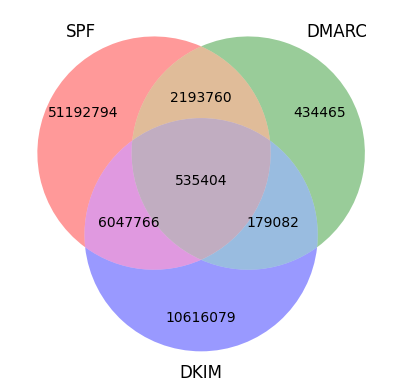

In [21]:
# Intersection Between SPF, DMARC & DKIM records (Securely Configured)

fig = plt.figure()
set_spf = set(spf_sec['_id'].tolist())
set_dmarc = set(dmarc_sec['_id'].tolist())
set_dkim = set(dkim_sec['_id'].tolist())

v = venn3_unweighted([set_spf, set_dmarc, set_dkim], ('SPF', 'DMARC', 'DKIM'))

default: 13542317
s1: 232195
google: 1690949
k1: 212767
mail: 972767
mandrill: 814298
selector1: 760510
smtpapi: 209057
m1: 218938
x: 1305111
dkim: 1302488
mailjet: 209724
cm: 208359


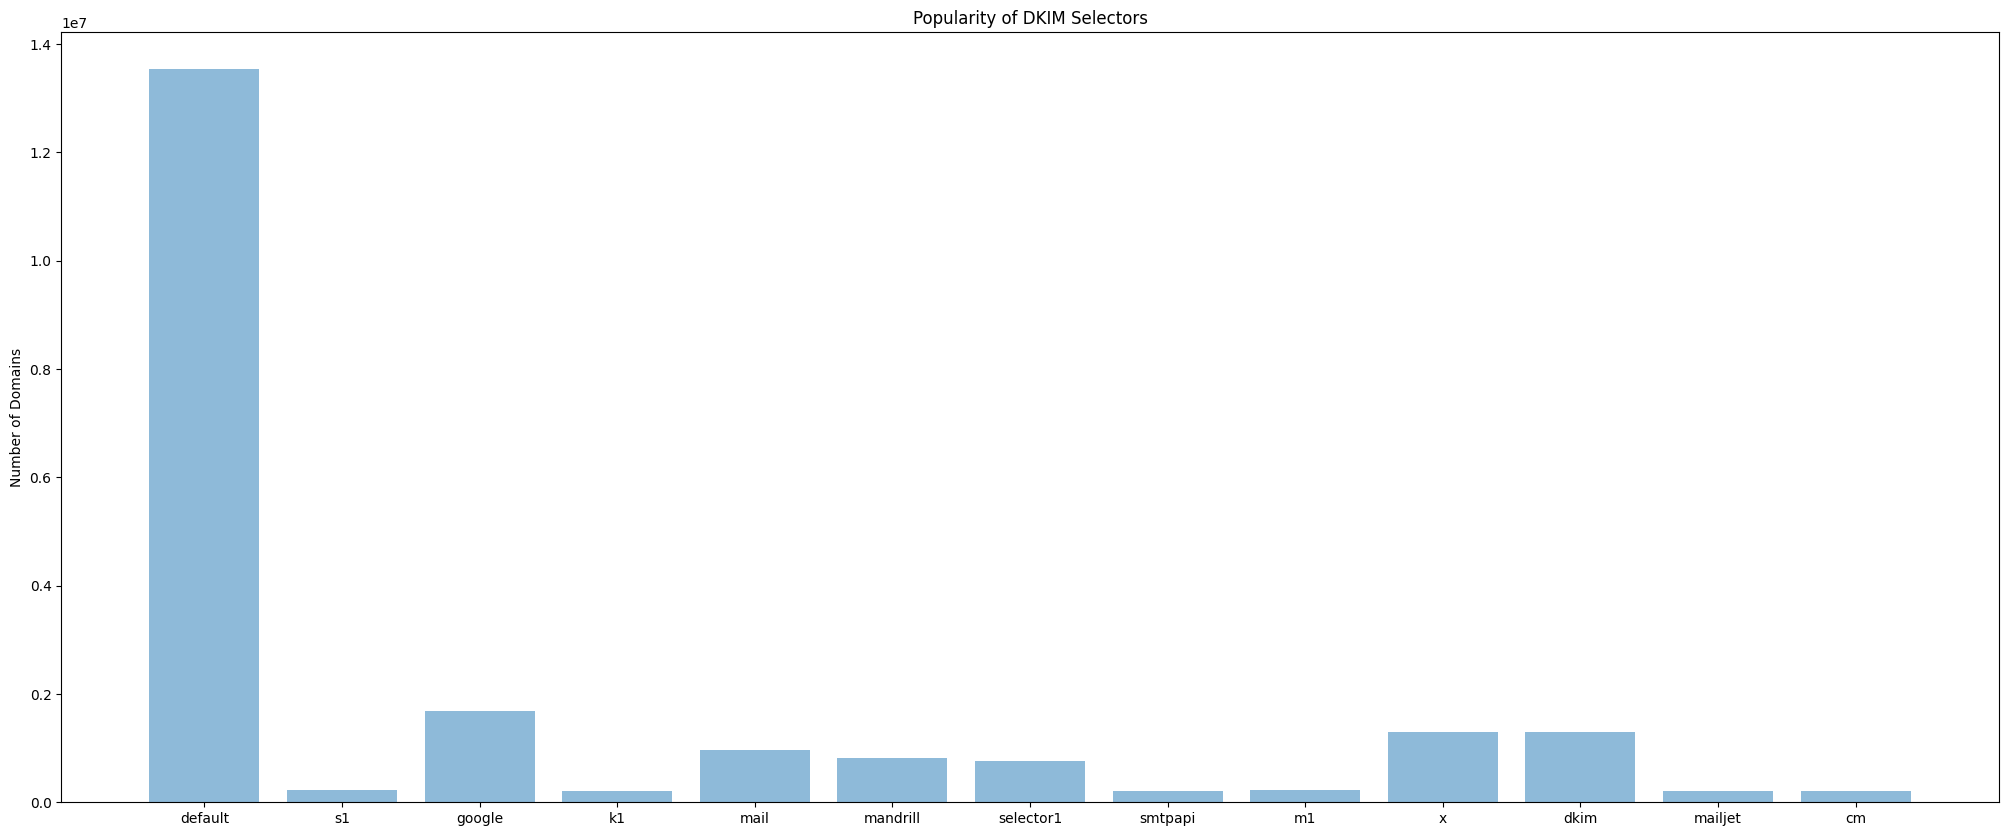

In [22]:
# Popularity of DKIM Selectors
col = 'dkim'
res = []
selist = ["default", "s1", "google", "k1", "mail", "mandrill", "selector1", "smtpapi","m1", "x", "dkim", "mailjet", "cm"]
for sel in selist:
    query = [{"$match": {'host':{'$regex':"^"+sel+".*"}}},{ "$group": {"_id": '$domain'}}]
    globals()['%s_df' % sel] = process_query(col,query)
    df = globals()['%s_df' % sel]
    count = df['_id'].nunique()
    inner_res = [sel,count]
    res.append(inner_res)

for r in res:
    print('%s: %i' % tuple(r))
    
slp = list(f[0] for f in res)
sln = list(f[1] for f in res)
y_pos = np.arange(len(res))
plt.figure(figsize=(25,10))
plt.bar(y_pos, sln, align='center', alpha=0.5)
plt.xticks(y_pos, slp)
plt.ylabel('Number of Domains')
plt.title('Popularity of DKIM Selectors')

plt.show()

mailstore1.secureserver.net.: 12292138
smtp.secureserver.net.: 12291035
aspmx.l.google.com.: 9128048
alt1.aspmx.l.google.com.: 8953268
alt2.aspmx.l.google.com.: 8910883
alt3.aspmx.l.google.com.: 5579627
alt4.aspmx.l.google.com.: 5537194
aspmx2.googlemail.com.: 3267100
aspmx3.googlemail.com.: 3194974
eforward1.registrar-servers.com.: 2459089
eforward5.registrar-servers.com.: 2458931
eforward4.registrar-servers.com.: 2458881
eforward2.registrar-servers.com.: 2458859
eforward3.registrar-servers.com.: 2458444
localhost.: 2189325
smtpin.rzone.de.: 2152851
mx3.mail.ovh.net.: 2140097
.: 2082411
mx01.kundenserver.de.: 1647004
mx00.kundenserver.de.: 1641169


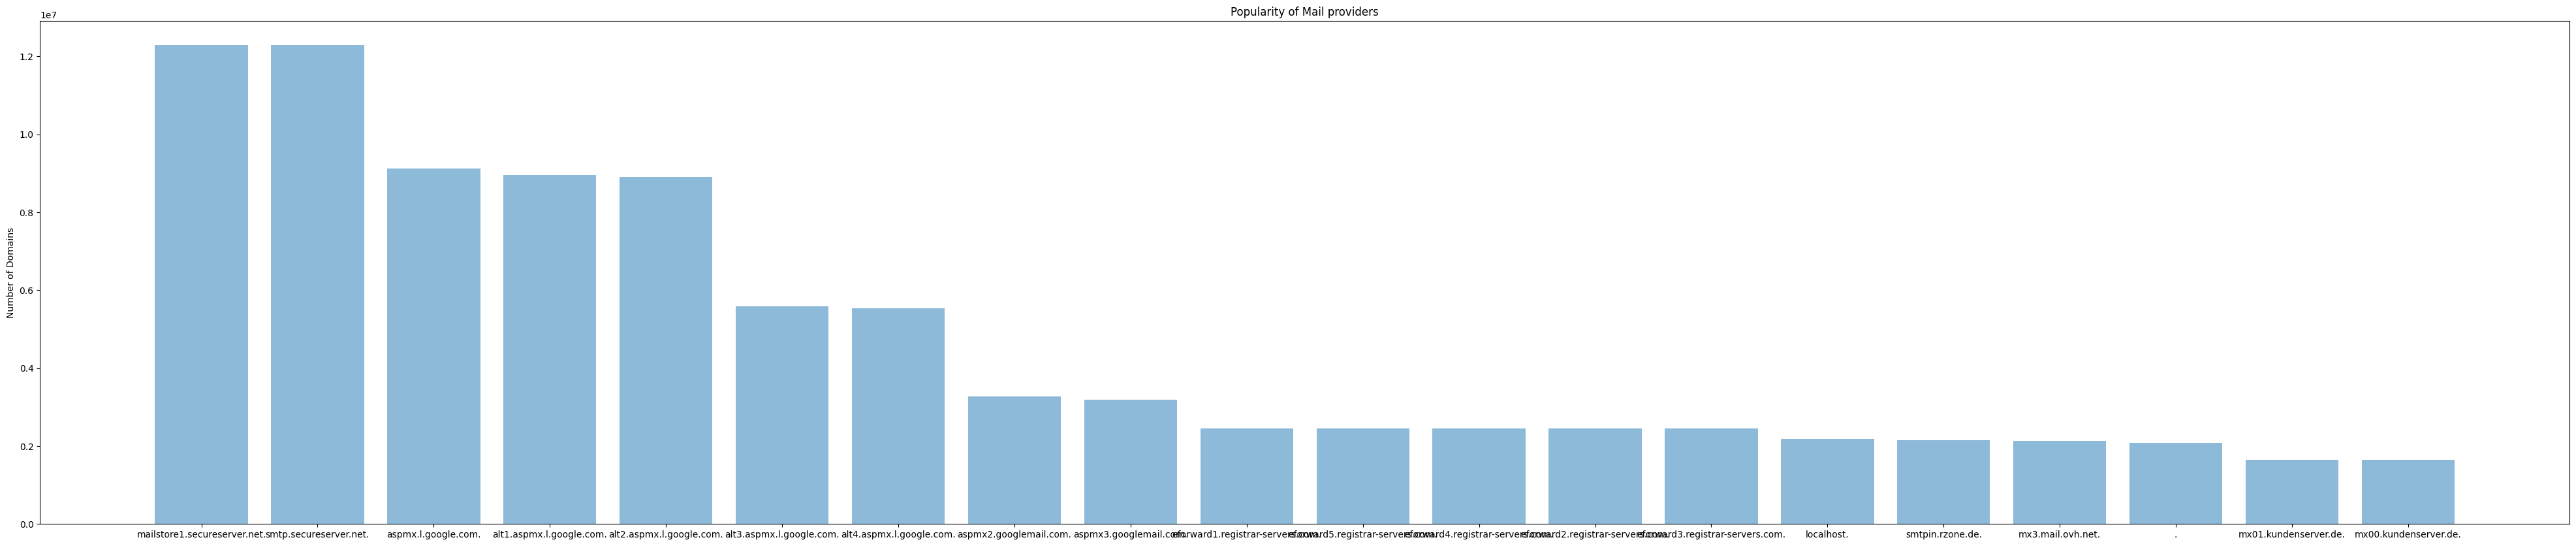

In [23]:
# Popularity of Mail Providers (based on MX)
col = 'mx'
query = [{ "$group": {"_id": '$mx',"count": { "$count": { } }}}]
cur = db[col].aggregate(query,allowDiskUse = True)
df = pd.DataFrame()
for batch in batched(cur, 10000):
    dfb = pd.DataFrame(list(batch))
    df = pd.concat([df, dfb])
mailp = df.values.tolist()

n = 20
res = sorted(mailp, key = lambda x: x[1], reverse = True)[:n]
for r in res:
    print('%s: %i' % tuple(r))

mxp = list(f[0] for f in res)
mxn = list(f[1] for f in res)
y_pos = np.arange(len(res))
plt.figure(figsize=(50,10))
plt.bar(y_pos, mxn, align='center', alpha=0.5)
plt.xticks(y_pos, mxp)
plt.ylabel('Number of Domains')
plt.title('Popularity of Mail providers')

plt.show()

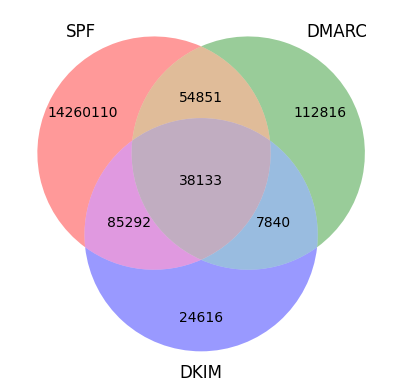

In [24]:
# Statistics - Domains using best practices when not used for emails
fig = plt.figure()
set_spf_bp = set(spf_non_email['_id'].tolist())
set_dmarc_bp = set(dmarc_non_email['_id'].tolist())
set_dkim_bp = set(dkim_non_email['_id'].tolist())

v = venn3_unweighted([set_spf_bp, set_dmarc_bp, set_dkim_bp], ('SPF', 'DMARC', 'DKIM'))

In [25]:
# File Generation - Set Formation

intersect_all = set_spf & set_dmarc & set_dkim

intersect_spf_dmarc = set_spf & set_dmarc
intersect_spf_dkim = set_spf & set_dkim
intersect_dmarc_dkim = set_dmarc & set_dkim

spf_dmarc_only = intersect_spf_dmarc - intersect_all
spf_dkim_only = intersect_spf_dkim - intersect_all
dmarc_dkim_only = intersect_dmarc_dkim - intersect_all

spf_only = set_spf - spf_dmarc_only - spf_dkim_only - intersect_all
dmarc_only = set_dmarc - spf_dmarc_only - dmarc_dkim_only - intersect_all
dkim_only = set_dkim - dmarc_dkim_only - spf_dkim_only - intersect_all

intersect_all_bp = set_spf_bp & set_dmarc_bp & set_dkim_bp

intersect_spf_dmarc_bp = set_spf_bp & set_dmarc_bp
intersect_spf_dkim_bp = set_spf_bp & set_dkim_bp
intersect_dmarc_dkim_bp = set_dmarc_bp & set_dkim_bp

spf_dmarc_only_bp = intersect_spf_dmarc_bp - intersect_all_bp
spf_dkim_only_bp = intersect_spf_dkim_bp - intersect_all_bp
dmarc_dkim_only_bp = intersect_dmarc_dkim_bp - intersect_all_bp

spf_only_bp = set_spf_bp - spf_dmarc_only_bp - spf_dkim_only_bp - intersect_all_bp
dmarc_only_bp = set_dmarc_bp - spf_dmarc_only_bp - dmarc_dkim_only_bp - intersect_all_bp
dkim_only_bp = set_dkim_bp - dmarc_dkim_only_bp - spf_dkim_only_bp - intersect_all_bp

In [27]:
# File Generation - Write Operations

f = open("/tmp/files/domains_with_all.txt", "w")
f.write('\n'.join(intersect_all))
f.close()

f = open("/tmp/files/domains_with_spf_only.txt", "w")
f.write('\n'.join(spf_only))
f.close()

f = open("/tmp/files/domains_with_dmarc_only.txt", "w")
f.write('\n'.join(dmarc_only))
f.close()

f = open("/tmp/files/domains_with_dkim_only.txt", "w")
f.write('\n'.join(dkim_only))
f.close()

f = open("/tmp/files/domains_with_spf_dmarc_only.txt", "w")
f.write('\n'.join(spf_dmarc_only))
f.close()

f = open("/tmp/files/domains_with_spf_dkim_only.txt", "w")
f.write('\n'.join(spf_dkim_only))
f.close()

f = open("/tmp/files/domains_with_dmarc_dkim_only.txt", "w")
f.write('\n'.join(dmarc_dkim_only))
f.close()

f = open("/tmp/files/domains_with_all_bp.txt", "w")
f.write('\n'.join(intersect_all_bp))
f.close()

f = open("/tmp/files/domains_with_spf_only_bp.txt", "w")
f.write('\n'.join(spf_only_bp))
f.close()

f = open("/tmp/files/domains_with_dmarc_only_bp.txt", "w")
f.write('\n'.join(dmarc_only_bp))
f.close()

f = open("/tmp/files/domains_with_dkim_only_bp.txt", "w")
f.write('\n'.join(dkim_only_bp))
f.close()

f = open("/tmp/files/domains_with_spf_dmarc_only_bp.txt", "w")
f.write('\n'.join(spf_dmarc_only_bp))
f.close()

f = open("/tmp/files/domains_with_spf_dkim_only_bp.txt", "w")
f.write('\n'.join(spf_dkim_only_bp))
f.close()

f = open("/tmp/files/domains_with_dmarc_dkim_only_bp.txt", "w")
f.write('\n'.join(dmarc_dkim_only_bp))
f.close()

com: 198969
nl: 51315
de: 23094
org: 21772
co.uk: 16645
com.br: 13183
com.au: 10272
fr: 9905
eu: 7721
dk: 7701


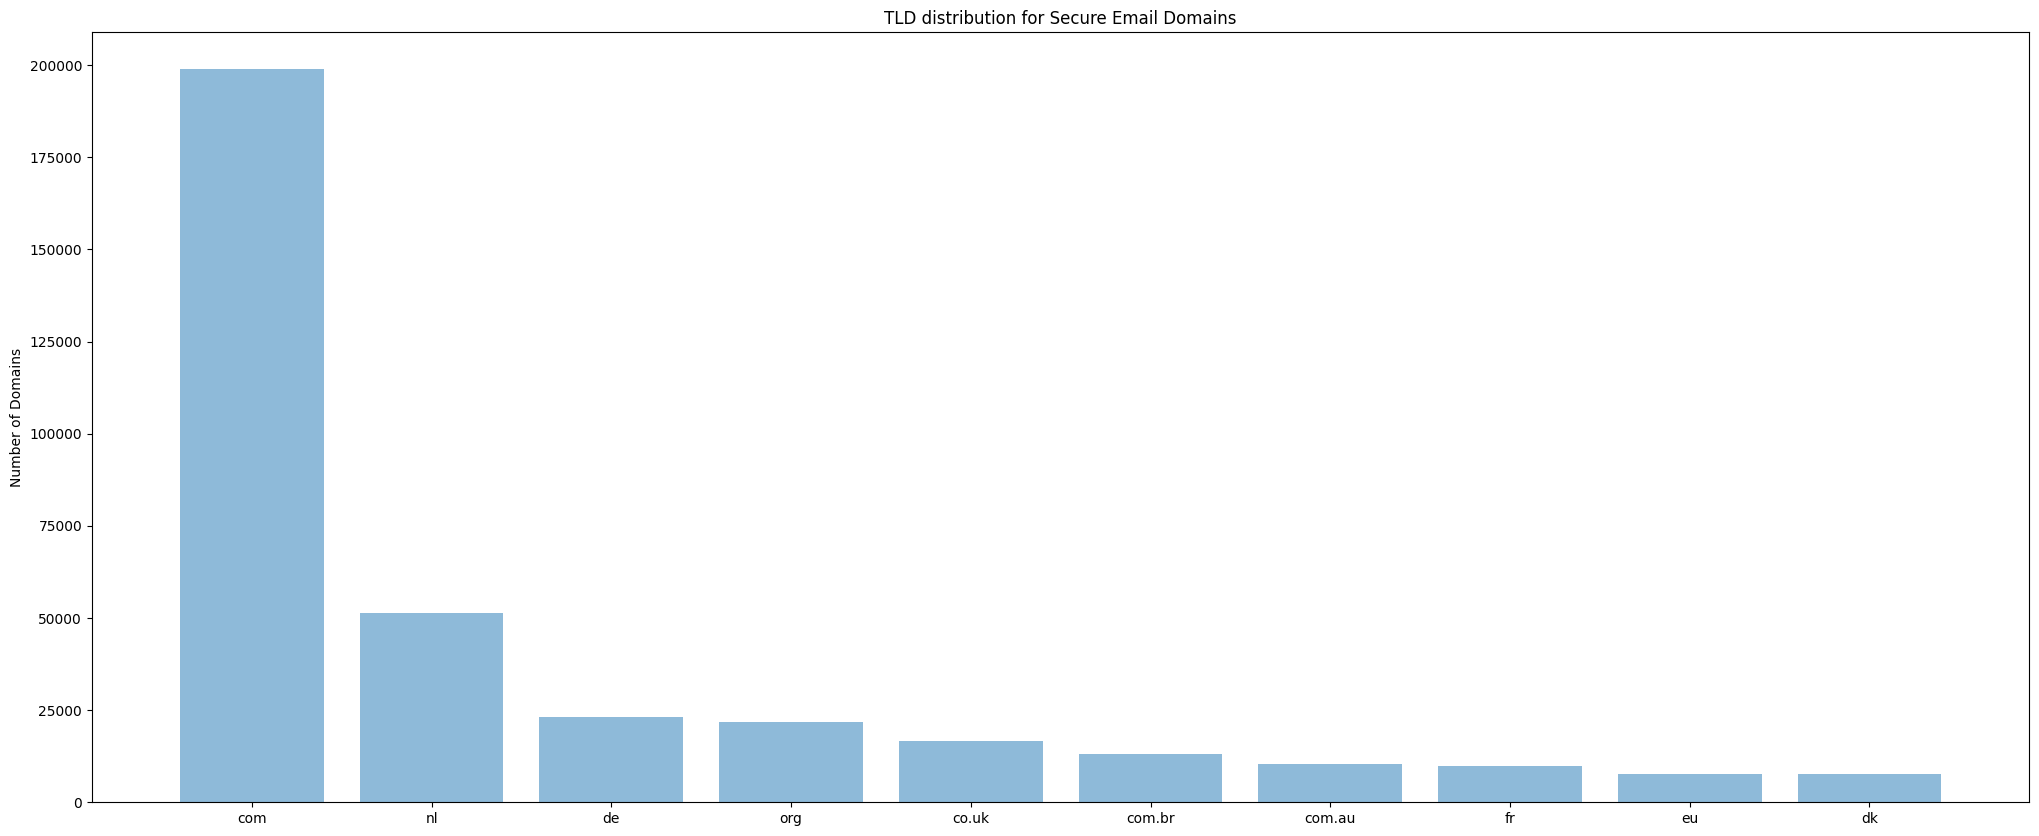

In [61]:
# TLD distribution for Secure Email Domains

extn = []
for domain in intersect_all:
    x = domain.split('.')[1:]
    ext = ".".join(x)
    extn.append(ext)

extl = []
for count, elem in sorted(((extn.count(e), e) for e in set(extn)), reverse=True):
    ext = [elem,count]
    extl.append(ext)

n = 10
res = sorted(extl, key = lambda x: x[1], reverse = True)[:n]
    
for r in res:
    print('%s: %i' % tuple(r))
    
slp = list(f[0] for f in res)
sln = list(f[1] for f in res)
y_pos = np.arange(len(res))
plt.figure(figsize=(25,10))
plt.bar(y_pos, sln, align='center', alpha=0.5)
plt.xticks(y_pos, slp)
plt.ylabel('Number of Domains')
plt.title('TLD distribution for Secure Email Domains')

plt.show()    

com: 15287
org: 2207
nl: 1249
co.uk: 1039
de: 924
info: 603
xyz: 600
it: 468
eu: 466
ca: 459


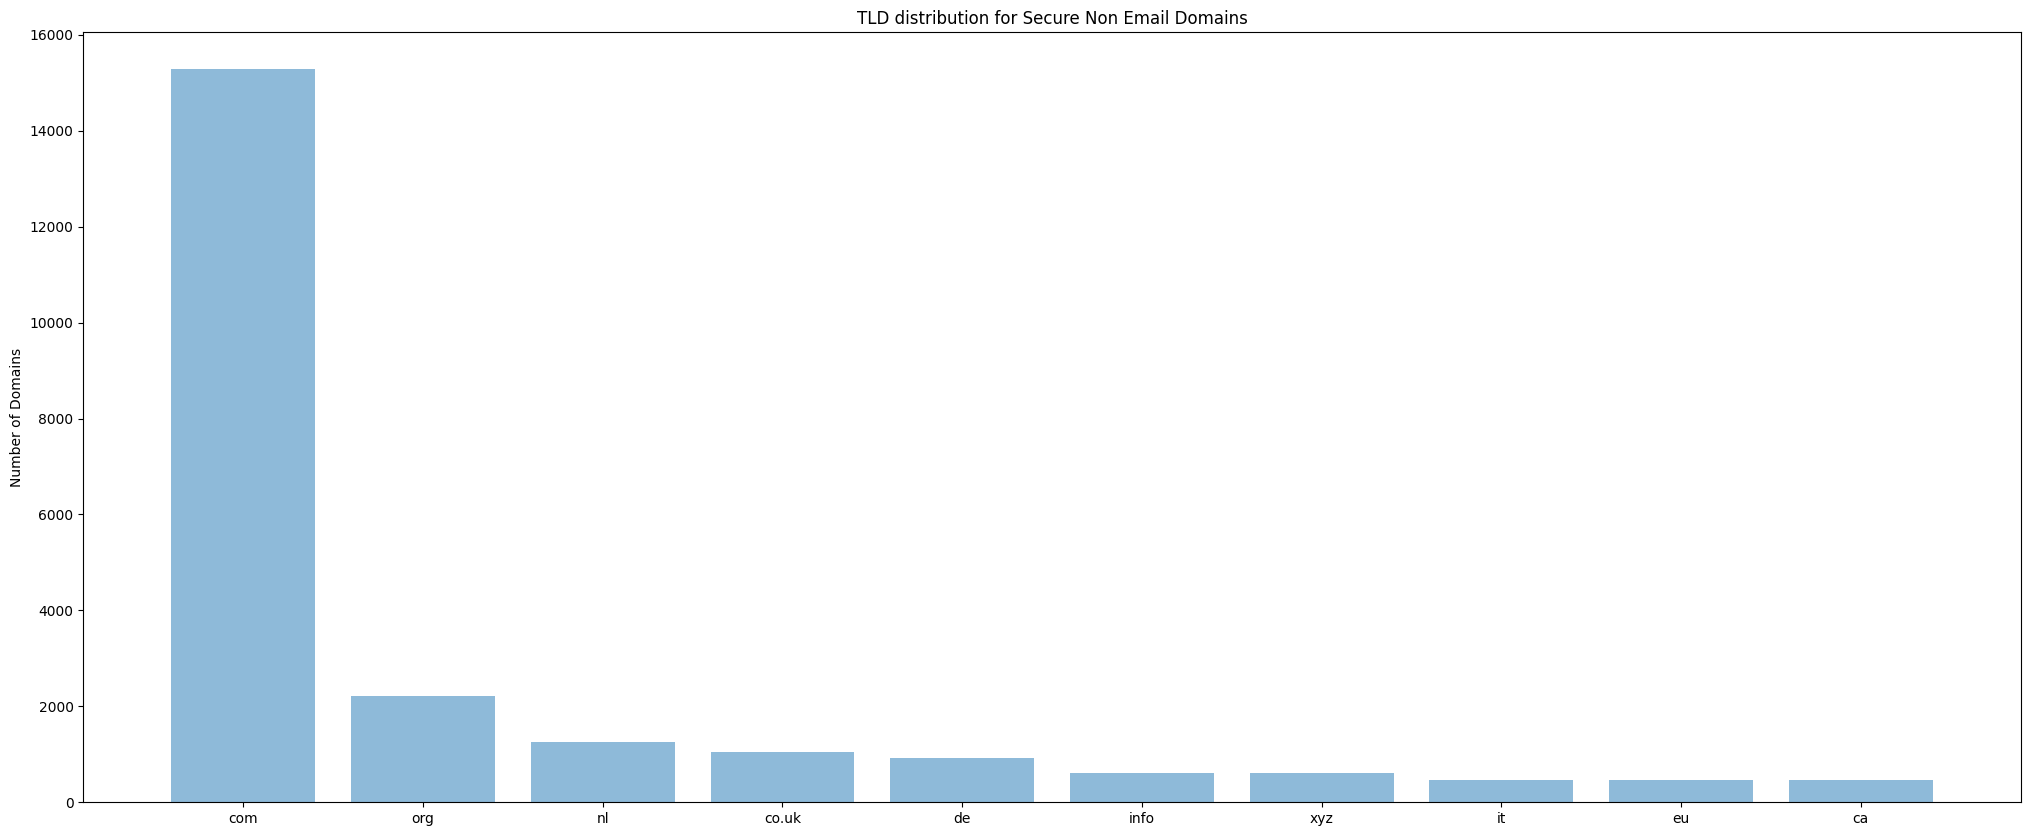

In [62]:
# TLD distribution for Secure Non Email Domains

extn = []
for domain in intersect_all_bp:
    x = domain.split('.')[1:]
    ext = ".".join(x)
    extn.append(ext)

extl = []
for count, elem in sorted(((extn.count(e), e) for e in set(extn)), reverse=True):
    ext = [elem,count]
    extl.append(ext)

n = 10
res = sorted(extl, key = lambda x: x[1], reverse = True)[:n]
    
for r in res:
    print('%s: %i' % tuple(r))
    
slp = list(f[0] for f in res)
sln = list(f[1] for f in res)
y_pos = np.arange(len(res))
plt.figure(figsize=(25,10))
plt.bar(y_pos, sln, align='center', alpha=0.5)
plt.xticks(y_pos, slp)
plt.ylabel('Number of Domains')
plt.title('TLD distribution for Secure Non Email Domains')

plt.show()    